In [2]:
import pandas as pd
import datetime
import seaborn as sns
import requests
import kaggle
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 150)

In [44]:
finaldf = pd.read_csv('/Users/Julia/Desktop/DC_capstone/finaldf.csv', low_memory=False)
mergedf = pd.read_csv('/Users/Julia/Desktop/DC_capstone/mergedf.csv', low_memory=False)
censusdf = pd.read_csv('/Users/Julia/Desktop/DC_capstone/censusdf.csv', low_memory=False)

In [4]:
finaldf.head()


,PRICE,SALE_DATE,SALE_NUM,QUALIFIED,QUADRANT,WARD,SQUARE,NBHD,SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,ZIPCODE,LATITUDE,LONGITUDE,X,Y,STYLE,STRUCT,USECODE,UNITS,STORIES,GRADE,CNDTN,LANDAREA,GBA,GBA_LIVING,YR_ORIGIN,YR_EXT,YR_RMDL,ROOMS,BEDRMS,BATHRMS,KITCHENS,HEAT,AC,FIREPLACES,ROOF,INTWALL,EXTWALL
0,1095000.0,2003-11-25,1.0,Q,NW,Ward 2,152,Old City 2,040 D Old City 2,4201,004201 2006,20009.0,38.914680,-77.040832,-77.040429,38.914881,3 Story,Row Inside,24.0,2.0,3.0,Very Good,Good,1680.0,2522.0,723.172363,1910.0,1972.0,1988.0,8.0,4.0,NaN,2.0,Warm Cool,Y,5.0,Metal- Sms,Hardwood,Common Brick
1,1602000.0,2006-07-12,1.0,Q,NW,Ward 2,152,Old City 2,040 D Old City 2,4201,004201 2006,20009.0,38.914683,-77.040629,-77.040429,38.914881,3 Story,Row Inside,24.0,2.0,3.0,Very Good,Good,1680.0,2484.0,723.172363,1900.0,1984.0,2003.0,8.0,5.0,NaN,2.0,Hot Water Rad,Y,3.0,Built Up,Hardwood,Common Brick
2,1050000.0,2011-09-29,1.0,Q,NW,Ward 2,152,Old City 2,040 D Old City 2,4201,004201 2005,20009.0,38.915408,-77.040129,-77.040429,38.914881,3 Story,Row Inside,24.0,2.0,3.0,Very Good,Average,1627.0,2401.0,723.172363,1906.0,1972.0,2011.0,8.0,4.0,NaN,2.0,Hot Water Rad,Y,1.0,Metal- Sms,Hardwood,Common Brick
3,1430000.0,2018-05-03,4.0,Q,NW,Ward 2,152,Old City 2,040 D Old City 2,4201,004201 2005,20009.0,38.915017,-77.039903,-77.040429,38.914881,2 Story,Row Inside,24.0,2.0,2.0,Above Average,Very Good,1424.0,1488.0,723.172363,1908.0,1967.0,2008.0,7.0,3.0,NaN,2.0,Warm Cool,Y,1.0,Built Up,Hardwood,Common Brick
4,1325000.0,2011-09-30,1.0,Q,NW,Ward 2,152,Old City 2,040 D Old City 2,4201,004201 2005,20009.0,38.915038,-77.039716,-77.040429,38.914881,2 Story,Row Inside,24.0,2.0,2.0,Above Average,Very Good,1815.0,2692.0,723.172363,1917.0,1967.0,2000.0,5.0,3.0,NaN,2.0,Warm Cool,Y,1.0,Metal- Sms,Hardwood,Stucco


In [5]:
mergedf.head()

,PRICE,SALE_DATE,SALE_NUM,QUALIFIED,QUADRANT,WARD,SQUARE,NBHD,SUBNBHD,CENSUS_BLOCK,ZIPCODE,LATITUDE,LONGITUDE,X,Y,STYLE,STRUCT,USECODE,UNITS_x,STORIES,GRADE,CNDTN,LANDAREA,GBA,GBA_LIVING,YR_ORIGIN,YR_EXT,YR_RMDL,ROOMS,BEDRMS,BATHRMS,KITCHENS,HEAT,AC,FIREPLACES,ROOF,INTWALL,EXTWALL,TRACT,POP,POP_ONE_RACE,WHITE,BLACK,NTV_AMR,ASIAN,PAC_ISL,HISP,OTHER,FAGI_TOTAL_2010,FAGI_MEDIAN_2010,FAGI_TOTAL_2013,FAGI_MEDIAN_2013,FAGI_TOTAL_2011,FAGI_MEDIAN_2011,FAGI_TOTAL_2012,FAGI_MEDIAN_2012,FAGI_TOTAL_2014,FAGI_MEDIAN_2014,FAGI_TOTAL_2015,FAGI_MEDIAN_2015,UNITS_y,OCCUPIED_UNITS,VACANT_UNITS,ACRES,SQ_MILES,SEGREGATION_PERC,SEGREGATION_LEVEL,MAJORITY_RACE
0,1095000.0,2003-11-25,1.0,Q,NW,Ward 2,152,Old City 2,040 D Old City 2,004201 2006,20009.0,38.914680,-77.040832,-77.040429,38.914881,3 Story,Row Inside,24.0,2.0,3.0,Very Good,Good,1680.0,2522.0,723.172363,1910.0,1972.0,1988.0,8.0,4.0,NaN,2.0,Warm Cool,Y,5.0,Metal- Sms,Hardwood,Common Brick,4201,3342,3250,2721,240,5,215,0,266,69,144465497.0,59325.0,195239173.0,69112.0,204654008.0,64162.0,221028580.0,67390.0,192640010.0,68708.5,215579124.0,70930.5,2259,2113,146,50.535095,0.078961,0.814183,moderate,WHITE
1,1602000.0,2006-07-12,1.0,Q,NW,Ward 2,152,Old City 2,040 D Old City 2,004201 2006,20009.0,38.914683,-77.040629,-77.040429,38.914881,3 Story,Row Inside,24.0,2.0,3.0,Very Good,Good,1680.0,2484.0,723.172363,1900.0,1984.0,2003.0,8.0,5.0,NaN,2.0,Hot Water Rad,Y,3.0,Built Up,Hardwood,Common Brick,4201,3342,3250,2721,240,5,215,0,266,69,144465497.0,59325.0,195239173.0,69112.0,204654008.0,64162.0,221028580.0,67390.0,192640010.0,68708.5,215579124.0,70930.5,2259,2113,146,50.535095,0.078961,0.814183,moderate,WHITE
2,1050000.0,2011-09-29,1.0,Q,NW,Ward 2,152,Old City 2,040 D Old City 2,004201 2005,20009.0,38.915408,-77.040129,-77.040429,38.914881,3 Story,Row Inside,24.0,2.0,3.0,Very Good,Average,1627.0,2401.0,723.172363,1906.0,1972.0,2011.0,8.0,4.0,NaN,2.0,Hot Water Rad,Y,1.0,Metal- Sms,Hardwood,Common Brick,4201,3342,3250,2721,240,5,215,0,266,69,144465497.0,59325.0,195239173.0,69112.0,204654008.0,64162.0,221028580.0,67390.0,192640010.0,68708.5,215579124.0,70930.5,2259,2113,146,50.535095,0.078961,0.814183,moderate,WHITE
3,1430000.0,2018-05-03,4.0,Q,NW,Ward 2,152,Old City 2,040 D Old City 2,004201 2005,20009.0,38.915017,-77.039903,-77.040429,38.914881,2 Story,Row Inside,24.0,2.0,2.0,Above Average,Very Good,1424.0,1488.0,723.172363,1908.0,1967.0,2008.0,7.0,3.0,NaN,2.0,Warm Cool,Y,1.0,Built Up,Hardwood,Common Brick,4201,3342,3250,2721,240,5,215,0,266,69,144465497.0,59325.0,195239173.0,69112.0,204654008.0,64162.0,221028580.0,67390.0,192640010.0,68708.5,215579124.0,70930.5,2259,2113,146,50.535095,0.078961,0.814183,moderate,WHITE
4,1325000.0,2011-09-30,1.0,Q,NW,Ward 2,152,Old City 2,040 D Old City 2,004201 2005,20009.0,38.915038,-77.039716,-77.040429,38.914881,2 Story,Row Inside,24.0,2.0,2.0,Above Average,Very Good,1815.0,2692.0,723.172363,1917.0,1967.0,2000.0,5.0,3.0,NaN,2.0,Warm Cool,Y,1.0,Metal- Sms,Hardwood,Stucco,4201,3342,3250,2721,240,5,215,0,266,69,144465497.0,59325.0,195239173.0,69112.0,204654008.0,64162.0,221028580.0,67390.0,192640010.0,68708.5,215579124.0,70930.5,2259,2113,146,50.535095,0.078961,0.814183,moderate,WHITE


In [70]:
censusdf.head()

,TRACT,POP,POP_ONE_RACE,WHITE,BLACK,NTV_AMR,ASIAN,PAC_ISL,HISP,OTHER,FAGI_TOTAL_2010,FAGI_MEDIAN_2010,FAGI_TOTAL_2013,FAGI_MEDIAN_2013,FAGI_TOTAL_2011,FAGI_MEDIAN_2011,FAGI_TOTAL_2012,FAGI_MEDIAN_2012,FAGI_TOTAL_2014,FAGI_MEDIAN_2014,FAGI_TOTAL_2015,FAGI_MEDIAN_2015,UNITS,OCCUPIED_UNITS,VACANT_UNITS,ACRES,SQ_MILES
0,3400,4347,4152,576,3392,20,97,3,239,64,53344073.0,39287.0,75037699.0,43117.0,59287920.0,38099.0,70436558.0,40413.0,79636907.0,42596.0,92096567.0,46152.0,1347,1025,322,266.264201,0.416038
1,3500,3740,3594,626,2681,14,106,0,371,167,46454657.0,30673.5,66239783.0,32859.5,55914150.0,30555.5,60909648.0,32885.0,78873551.0,40450.0,97549566.0,44843.0,1189,964,225,94.352383,0.147426
2,3600,4208,4048,1773,1645,13,161,0,809,456,110621750.0,35858.0,161376203.0,42788.5,147954698.0,40355.0,153247476.0,40692.0,143081526.0,41616.0,178040405.0,46806.0,2308,1987,321,75.521648,0.118003
3,3700,5763,5507,1915,2527,22,212,10,1514,821,103905996.0,32263.0,162058134.0,41387.5,126923023.0,35705.5,143596631.0,38248.0,140501730.0,39131.0,181651966.0,45690.5,2570,2401,169,72.231863,0.112862
4,3800,4614,4419,2884,825,22,261,1,935,426,155960140.0,48799.0,209040361.0,54786.0,196678623.0,52077.0,213601983.0,54908.0,213544242.0,56380.0,235619338.0,60561.0,2861,2625,236,87.921652,0.137378


### A map of DC showing ward locations for sales: 

Text(0.5, 1.0, 'LOCATION OF REAL ESTATE SALES, 1992-2018')

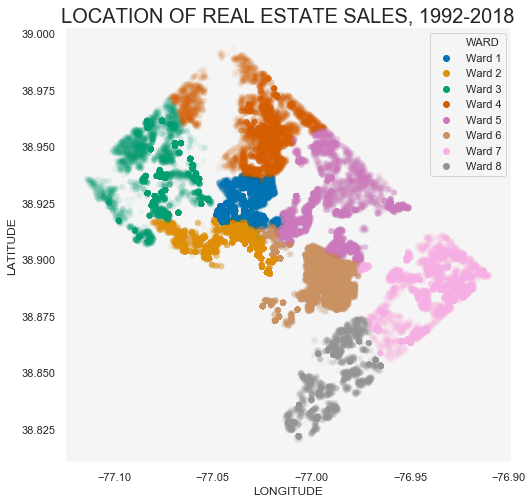

In [141]:
#convert date to year
gendf = finaldf
gendf.SALE_DATE = finaldf.SALE_DATE.astype("datetime64")

start_date= '01-01-1992'
end_date = '12-31-2018'
mask = (gendf.SALE_DATE >= start_date) & (gendf.SALE_DATE <= end_date)
gendf = brdf.loc[mask]

cat_type = pd.api.types.CategoricalDtype(
            categories=["Ward 1", "Ward 2", "Ward 3", "Ward 4", \
                    "Ward 5", "Ward 6", "Ward 7", "Ward 8"], ordered=True)
gendf.WARD = gendf['WARD'].astype(cat_type)

sns.set_style({'axes.grid' : False}, rc={'axes.facecolor':'whitesmoke'})
plt.figure(figsize=(8,8))
g = sns.scatterplot(data=gendf, x='LONGITUDE', y='LATITUDE', 
                    hue ='WARD', palette='colorblind', **{"alpha":.05}, 
                    edgecolor='none')
plt.setp(ax.get_legend().get_texts(), fontsize='40')
g.set_title('LOCATION OF REAL ESTATE SALES, 1992-2018', size=20)

## How have housing prices changed over time?

Text(0.5, 1.0, 'Timeseries: Prices for Varied Units, 1992-2018')

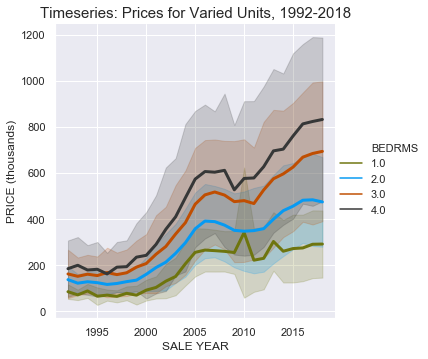

In [130]:
#https://www.programcreek.com/python/example/96204/seaborn.FacetGrid
brdf = finaldf[(finaldf['BEDRMS'] > 0) & (finaldf['BEDRMS'] <= 4)]

#convert date to year
brdf.SALE_DATE = brdf.SALE_DATE.astype("datetime64")

start_date= '01-01-1992'
end_date = '12-31-2018'
mask = (brdf.SALE_DATE >= start_date) & (brdf.SALE_DATE <= end_date)
brdf = brdf.loc[mask]

###
bdf = brdf[['WARD', 'BEDRMS', 'SALE_DATE', 'PRICE']]
SALE_YR = brdf.SALE_DATE.dt.strftime('%Y')
bdf.loc[:, 'SALE_YR'] = SALE_YR
bdf = bdf.drop(['SALE_DATE'], axis=1)

bdf.WARD = bdf.WARD.astype('category')
bdf.SALE_YR = bdf.SALE_YR.astype('int')
bdf.PRICE = bdf.PRICE/1000

#groupby to get median price 
bdf = bdf.groupby(['WARD', 'SALE_YR','BEDRMS'])['PRICE'].median()
bdf = bdf.reset_index(level=['WARD', 'SALE_YR', 'BEDRMS'])

col_list = ['olive', 'azure', 'burnt orange', 'dark grey']
sns.set()
g = sns.relplot(data=bdf, x='SALE_YR', y='PRICE', hue='BEDRMS',
               palette=sns.xkcd_palette(col_list), kind='line', markers=True, ci="sd", linewidth=3)
plt.xlabel('SALE YEAR')
plt.ylabel('PRICE (thousands)')
plt.title("Timeseries: Prices for Varied Units, 1992-2018" ,size=15)



#### TAKEAWAYS:
* Prices for 4 bedrooms more than quadrupled.
* Prices for 1 and 3 bedrooms nearly tripled.
* Prices for 2 bedrooms nearly doubled.
* The most dramatic growth in real estate occurred from 1996-2006 and 2011-2016.
* There was a decrease in value between 2006 and 2011.

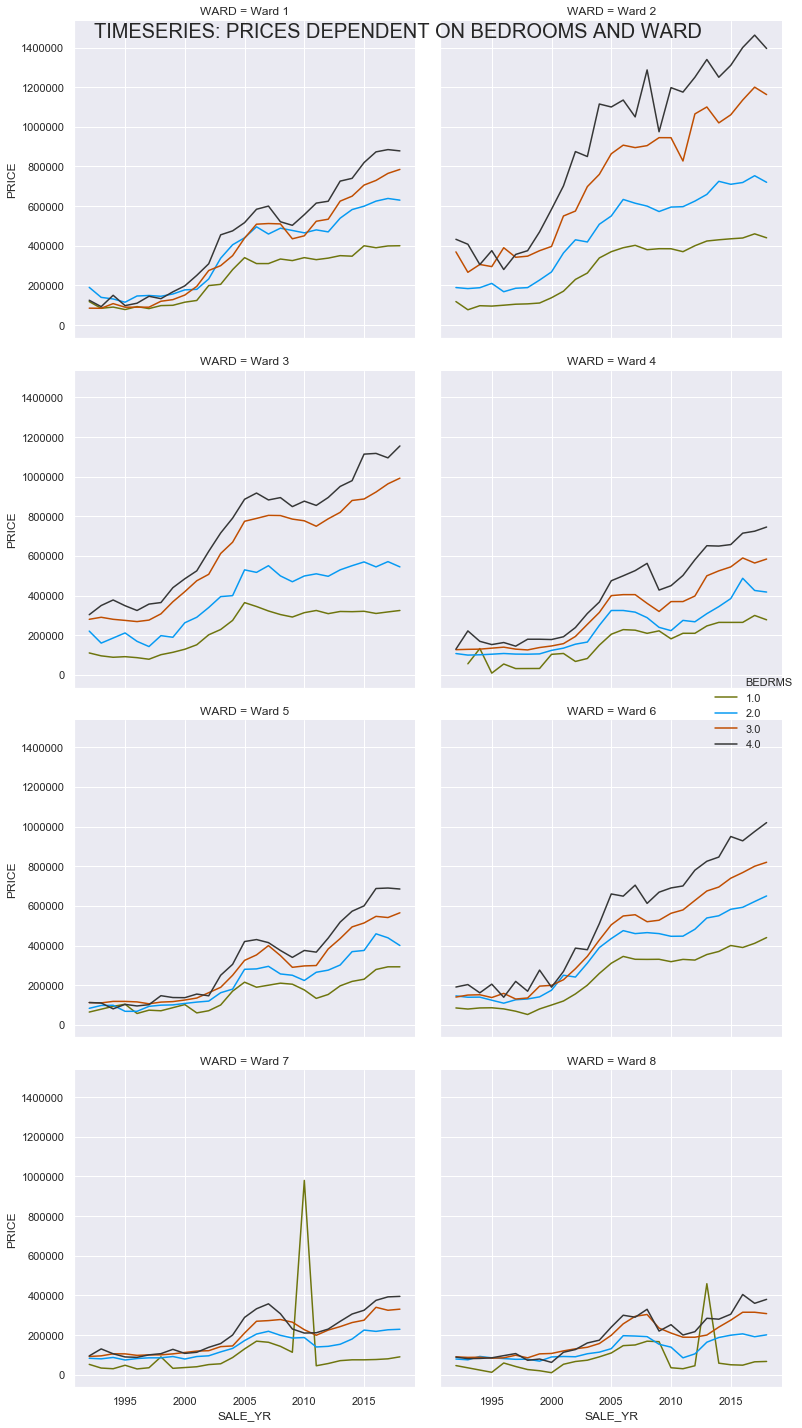

In [60]:
#plot
col_list = ['olive', 'azure', 'burnt orange', 'dark grey']
col_list_palette = sns.xkcd_palette(col_list)
sns.set_palette(col_list_palette)
sns.set()
g = sns.relplot(data=bdf, x='SALE_YR', y='PRICE', col='WARD', col_wrap=2, hue='BEDRMS',
               palette=sns.xkcd_palette(col_list), kind='line', markers=True, ci="sd")
plt.suptitle("TIMESERIES: PRICES DEPENDENT ON BEDROOMS AND WARD", size=20)

plt.tight_layout()

#### TAKEAWAYS:
* WARDS 2 and 3 have the greatest range in property values.
* WARD 7 and 8 consistently have the lowest property values.
* There are some unusual 1 bedroom prices in WARDS 7 and 8 between 2010 and 2013.
* WARD 6 has the most consistent growth in property values between 2008 and 2018.

## Where are the most property sales happening?

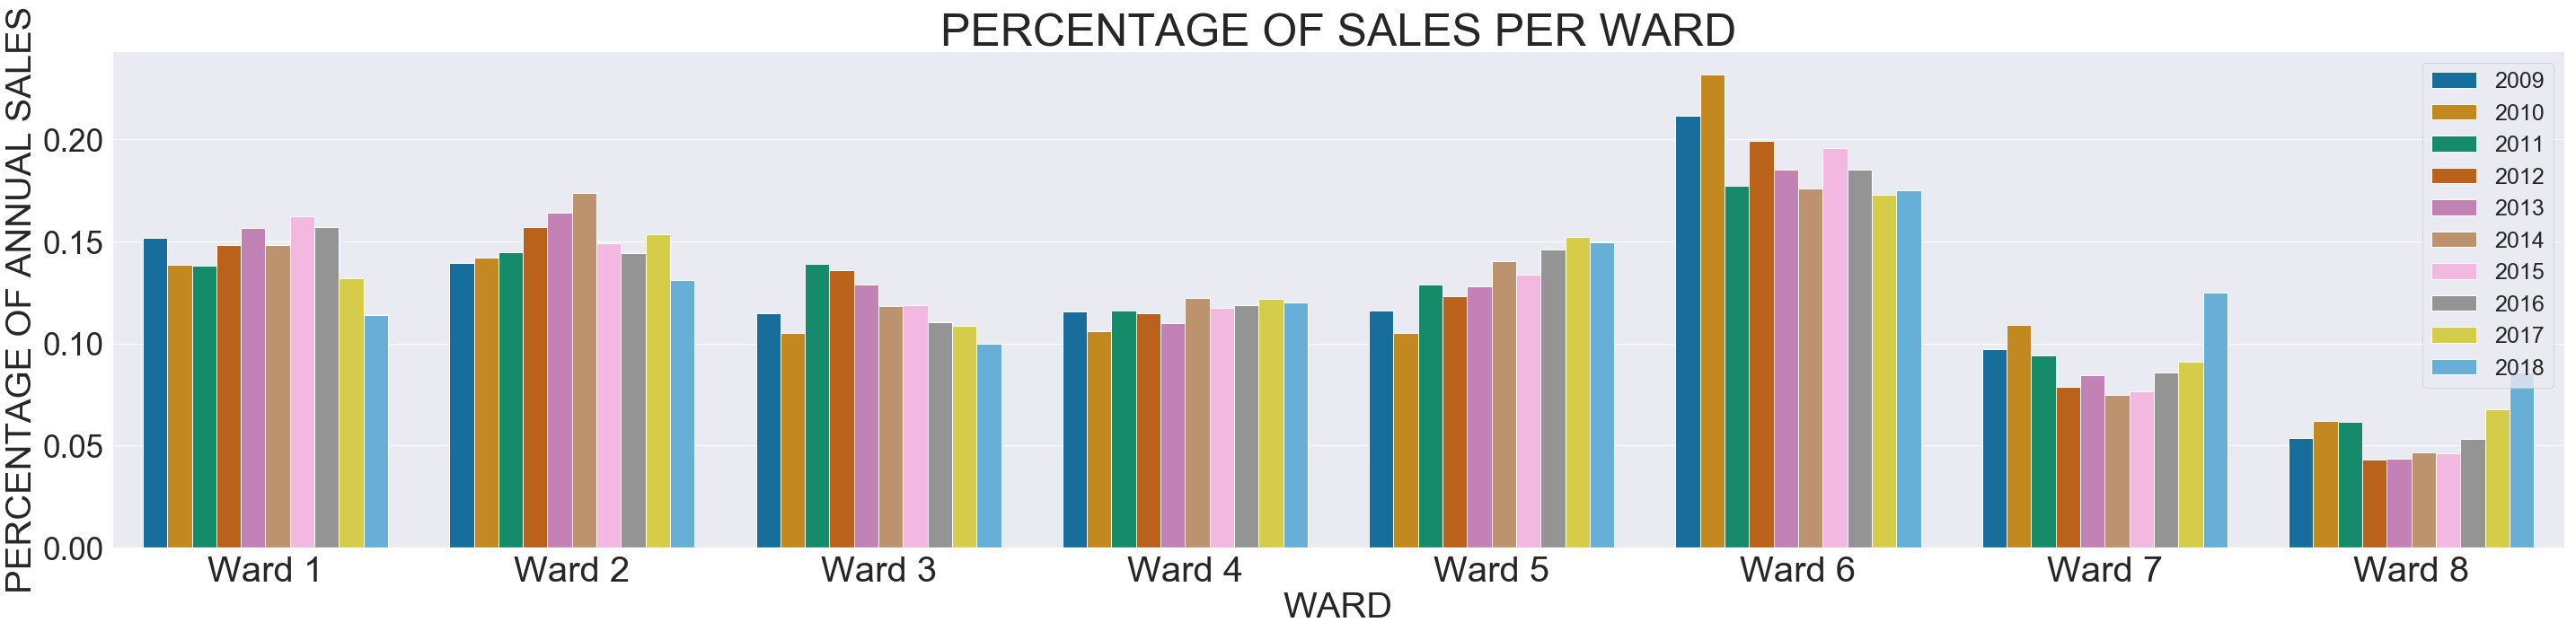

In [133]:
persdf = finaldf[['WARD', 'PRICE', 'SALE_DATE']]

#convert date to year
persdf.SALE_DATE = persdf.SALE_DATE.astype("datetime64")

start_date = '01-01-2009'
end_date = '12-31-2018'
mask = (persdf.SALE_DATE >= start_date) & (persdf.SALE_DATE <= end_date)
persdf = persdf.loc[mask]

SALE_YR = persdf.SALE_DATE.dt.strftime('%Y')
persdf.loc[:, 'SALE_YR'] = SALE_YR
persdf = persdf.drop(['SALE_DATE'], axis=1)

#count of prices
persdf = persdf.groupby(['SALE_YR', 'WARD']).count()

#sums['SUMS'] = counts per year
#tdf['PRICE'] = counts of sales per ward
sums = persdf.sum(level=['SALE_YR'])
sums['SUMS'] = sums['PRICE']
sums = sums.drop(['PRICE'], axis=1)

tdf = persdf.reset_index().merge(sums, how="left", on='SALE_YR').set_index(['SALE_YR', 'WARD'])

#getting percentage of each ward() from totals(SUMS)
PERC_YR = [(tdf.loc[ind,'PRICE'] / tdf.loc[ind, 'SUMS']) for ind, row in tdf.iterrows()]
tdf['PERC_YR']=PERC_YR

tdf.reset_index(level=['SALE_YR', 'WARD'], inplace=True)

sns.set()
plt.figure(figsize=(40,10))
ax = sns.barplot(data=tdf, x='WARD', y='PERC_YR', hue='SALE_YR', palette='colorblind', ci=0)
plt.xticks(size=40)
plt.yticks(size=35)
plt.xlabel('WARD', fontsize=40)
plt.ylabel('PERCENTAGE OF ANNUAL SALES', fontsize=40)
ax.set_title('PERCENTAGE OF SALES PER WARD', fontsize='50')
plt.legend(fontsize=25)
plt.tight_layout()

#### TAKEAWAYS:
* WARDS 7 and 8 have generally had the lowest number of sales, <br> 
but had a very dramatic increase in real estate sales between 2016 and 2018.
* WARD 6 consistently has the highest number of sales.
* WARD 4 consistently maintains about 12% of sales
* WARD 5 has seen a consistent increase in percentage of sales after 2011, <br>
and WARD 3 has seen a consistent decrease in percentage of sales after 2011.

## Is housing affordable for local residents?

Text(0.5, 1.0, '2010-2014 AFFORDABILITY OF 2-BEDROOM SALES')

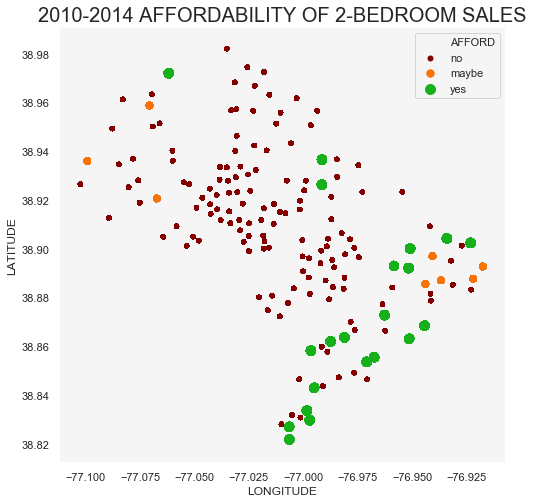

In [119]:
#reference for calculations: https://www.thebalance.com/calculate-mortgage-315668

#Mortgage function:

def mortgage(pricedf, mergedf, fagi):
    for ind, row in pricedf.iterrows():
        n = 12 * 30
        i = .05/12
        d = (((1 + i)**n)-1) / (i*(1+i)**n)
        plow = (pricedf.loc[ind, fagi] * .28 / 12)
        alow = plow * d 
        tlow = alow / .93 
        phigh = (pricedf.loc[ind, fagi] * .32 / 12) 
        ahigh = phigh * d 
        thigh = ahigh / .93 
        if (pricedf.loc[ind, 'PRICE'] > thigh):
            pricedf.loc[ind, 'AFFORD'] = 'no'
        if ((pricedf.loc[ind, 'PRICE'] <= thigh) & (pricedf.loc[ind, 'PRICE'] >= tlow)):
            pricedf.loc[ind, 'AFFORD'] = 'maybe'
        if (pricedf.loc[ind, 'PRICE'] < tlow):
            pricedf.loc[ind, 'AFFORD'] = 'yes'
        pricedf.loc[ind, 'LOW_MORTGAGE'] = plow
        pricedf.loc[ind, 'HIGH_MORTGAGE'] = phigh
    
    pricedf.reset_index(level=0, inplace=True)
    wardf = mergedf[['WARD', 'TRACT']]
    pricedf = pd.merge(pricedf, wardf, on='TRACT', how='left')           
    cataff = pd.api.types.CategoricalDtype(
            categories=["no", "maybe", "yes"], ordered=True)
    pricedf.AFFORD = pricedf.AFFORD.astype(cataff) 
    return pricedf



#mergeddf according to timeframe (first=2010-2014, second=2015-2018)
mergedf.SALE_DATE = pd.to_datetime(mergedf.SALE_DATE)
start_date= '01-01-2010'
end_date = '12-31-2014'
fmask = (mergedf.SALE_DATE >= start_date) & (mergedf.SALE_DATE <= end_date)
fmergedf = mergedf.loc[fmask]

start_date= '01-01-2015'
end_date = '12-31-2018'
smask = (mergedf.SALE_DATE >= start_date) & (mergedf.SALE_DATE <= end_date)
smergedf = mergedf.loc[smask]

fpricedf2 = \
fmergedf[(fmergedf['BEDRMS'] == 2)].groupby('TRACT')[['PRICE', 'LATITUDE', 'LONGITUDE', 'FAGI_MEDIAN_2012']].median()



#apply function
Fpricedf2 = mortgage(fpricedf2, mergedf, 'FAGI_MEDIAN_2012')

#graph
affordlevels = ['dark red', 'orange', 'green']
sns.set_style({'axes.grid' : False}, rc={'axes.facecolor':'whitesmoke'})
plt.figure(figsize=(8,8))
g = sns.scatterplot(data=Fpricedf2, x='LONGITUDE', y='LATITUDE', 
                    hue ='AFFORD', size='AFFORD', sizes=[25, 55, 100], palette=sns.xkcd_palette(affordlevels), **{"alpha":.8}, 
                    edgecolor='none')
g.set_title('2010-2014 AFFORDABILITY OF 2-BEDROOM SALES', size=20)

#### TAKEAWAYS:
* Housing is most affordable for local residents in southeast DC (WARDS 7 and 8)
* Housing is somewhat more affordable for local residents in northwest DC (WARDS 2 and 3).
* Housing is consistently unaffordable in central DC.

## How has affordability changed over time?